<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/Ejemplo_Coderhouse_Afterclass_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data/code

In [34]:
!wget -N https://raw.githubusercontent.com/sightes/COFFETALKS/main/Clustering/kmeans_result.csv

--2022-01-27 22:46:53--  https://raw.githubusercontent.com/sightes/COFFETALKS/main/Clustering/kmeans_result.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9648 (9.4K) [text/plain]
Saving to: ‘kmeans_result.csv’

kmeans_result.csv   100%[===================>]   9.42K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2022-01-27 22:46:53 (68.4 MB/s) - ‘kmeans_result.csv’ saved [9648/9648]



In [35]:
import pandas as pd
train_df = pd.read_csv('kmeans_result.csv')
train_df.sample(10) # Random 10 rows from the data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
23,Brunei,10.5,67.4,2.84,28.0,80600,16.70,77.1,1.84,35300,2
74,Israel,4.6,35.0,7.63,32.9,29600,1.77,81.4,3.03,30600,2
141,St. Vincent and the Grenadines,20.7,26.9,4.47,57.1,9920,4.44,71.6,2.07,6230,1
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.20,75.1,2.96,19300,1
121,Poland,6.0,40.1,7.46,42.1,21800,1.66,76.3,1.41,12600,1
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.90,68.2,4.98,1200,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,0
100,Mauritius,15.0,51.2,6.00,62.2,15900,1.13,73.4,1.57,8000,1
98,Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100,2
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0


In [3]:
# Basic Decriptive Analysis
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00
KMeans_Clusters,167.0,0.934132,0.704014,0.0000,0.000,1.00,1.00,2.00


In [36]:
train_df.isnull().sum()

country            0
child_mort         0
exports            0
health             0
imports            0
income             0
inflation          0
life_expec         0
total_fer          0
gdpp               0
KMeans_Clusters    0
dtype: int64

In [5]:
train_df.dtypes

country             object
child_mort         float64
exports            float64
health             float64
imports            float64
income               int64
inflation          float64
life_expec         float64
total_fer          float64
gdpp                 int64
KMeans_Clusters      int64
dtype: object

In [37]:
from sklearn.preprocessing import StandardScaler

features = ['exports', 'health','imports','income', 'inflation', 'life_expec','child_mort']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df[features])
scaled_data = pd.DataFrame(scaled_data, columns=features)

In [48]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, init='k-means++')
# 2 is just an arbitrary number, we will find the exact number soon below
model.fit(scaled_data[features])
scaled_data['KMeans'] = model.predict(scaled_data[features])

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(scaled_data[features])

In [50]:
x_proy=projected[:, 0]
y_proy=projected[:, 1]
paises=train_df['country'].values

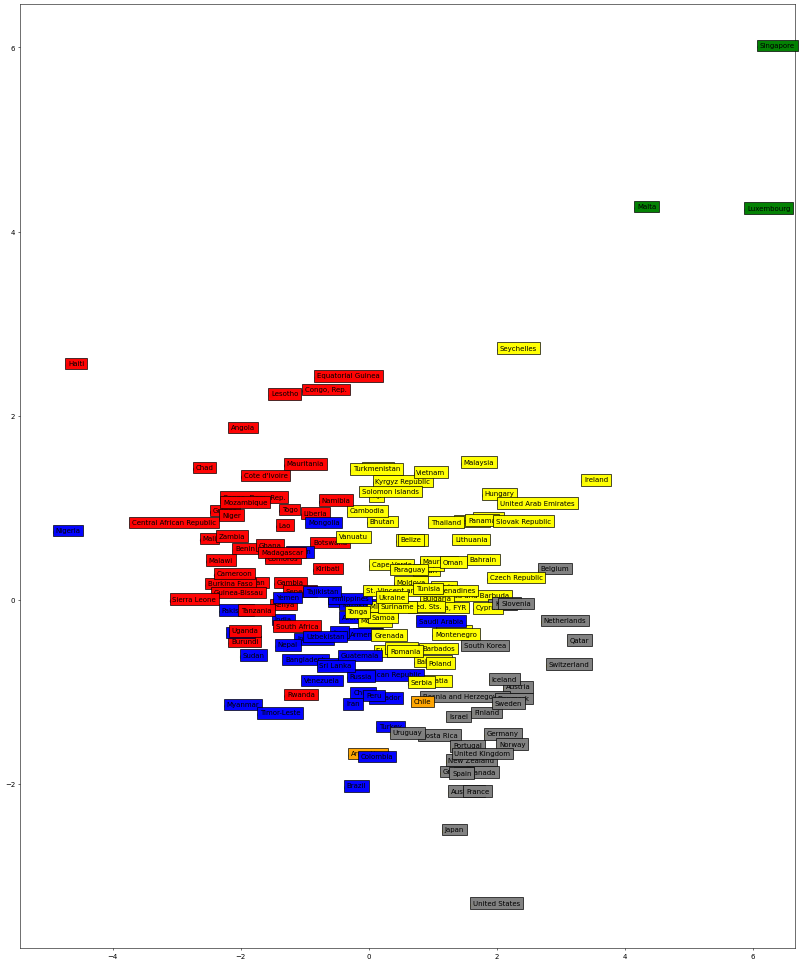

In [54]:
import matplotlib.pyplot as plt
#TAMANIO IMAGEN
plt.rcParams["figure.figsize"] = (20,25)
plt.rcParams['figure.dpi'] = 50
colors=['red','yellow','green','blue','gray']
plt.scatter(x_proy,y_proy,c=scaled_data['KMeans'] ) 
for i in range(0,len(paises)):
  if paises[i]=='Chile' or paises[i]=='Argentina':
    plt.text(x_proy[i],y_proy[i],paises[i], bbox=dict(facecolor='orange', alpha=5))
  else:
    plt.text(x_proy[i],y_proy[i],paises[i], bbox=dict(facecolor=colors[scaled_data['KMeans'][i]], alpha=5))
plt.show()

0